In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Breast Cancer

## Model

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Metrics

### Accuracy

In [3]:
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9035087719298246


### Precision

In [4]:
print('Precision', precision_score(y_test, y_pred))

Precision 0.9295774647887324


### Classification Report

In [5]:
print('Classification report', classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.93      0.92      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



We can see that there are macro and weighted average. Average is how we average the precision/recall/F1 values out of every class. Accuracy doesn't need one.

This is because precision, recall, and F1 are class-based metrics. Unlike accuracy that calculated using total correct predictions / total samples, precision/recall/F1 are metrics defined per class. Each class has its own TP, FP, and FN, so we will get three different values of precision/recall/F1.

We don't need to do this on binary classification because its output are already 1 and 0, which we will calculate the precision/recall/F1 using them. The output are not 2 classes, rather a positive and negative values. This is why we don't need an average metric.

There are 3 different average metrics:
1. Macro: average all classes equally. It compute each class' metric separately and average them
2. Weighted: each class has a weight defined by its class size, this if for imbalance sample
3. Micro: compute the precision/recall/F1 globally, instead of compute it separately and average them

### Confusion Matrix

In [6]:
cm = confusion_matrix(y_test, y_pred)

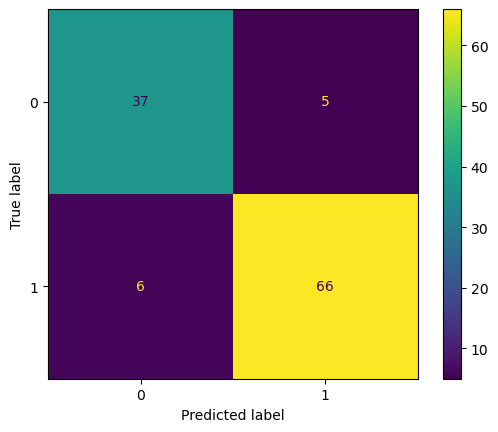

In [7]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Cross Validation

cross validation is a code to check different train & test section of a dataset. When we train/test split a dataset, we only split them into two parts, the train and test parts. However, when we use cross validation, we can make say 5 folds. The model will then split the data into 5 parts. Then, CV will use 4 parts as the train sample and the 1 part as the test size. This process repeats 5 times until every part was used for the test size, so there will be 5 output

In [8]:
model = KNeighborsClassifier(n_neighbors = 3)

#we do cross validation with 5 folds and accuracy as the scoring
scores = cross_validate(model, X, y, scoring='accuracy', cv=5)
scores

{'fit_time': array([0.00101495, 0.00200629, 0.00111508, 0.        , 0.        ]),
 'score_time': array([0.07373142, 0.06768084, 0.06961012, 0.07031798, 0.07044291]),
 'test_score': array([0.87719298, 0.92105263, 0.94736842, 0.93859649, 0.91150442])}

#### Summarising the Score

We can evaluate the model performance by summarising the cv score. We use average to see the model performance and standard deviation to see how stable the model is. Low standard deviation means the model performance is consistent across split.

In [10]:
scores['test_score'].mean()

0.9191429902189101

In [11]:
scores['test_score'].std()

0.02448228425072479

# Iris

We will also evaluate dataset with more than 2 categories

## Model

In [16]:
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Metrics

### Accuracy

In [24]:
print(f"Accuracy, {accuracy_score(y_pred, y_test):2f}")

Accuracy, 0.977778


### Precision

In [25]:
print('Precision', precision_score(y_test, y_pred, average='macro'))

Precision 0.9824561403508771


### F1-Score

In [27]:
print('F1_score', f1_score(y_test, y_pred, average='micro'))

F1_score 0.9777777777777777


Because there are more than 2 categories, we need to specify the average parameter for metrics other than accuracy score